# 학생 성과 예측

[1] 모듈 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

[2] 데이터 준비

In [2]:
dataDF=pd.read_csv('student_performance_prediction.csv')
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         38005 non-null  float64
 2   Attendance Rate                              38008 non-null  float64
 3   Previous Grades                              38006 non-null  float64
 4   Participation in Extracurricular Activities  38000 non-null  object 
 5   Parent Education Level                       38000 non-null  object 
 6   Passed                                       38000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


In [3]:
dataDF.head()

Student ID  Study Hours per Week  Attendance Rate  Previous Grades  \
0     S00001                  12.5              NaN             75.0   
1     S00002                   9.3             95.3             60.6   
2     S00003                  13.2              NaN             64.0   
3     S00004                  17.6             76.8             62.4   
4     S00005                   8.8             89.3             72.7   

  Participation in Extracurricular Activities Parent Education Level Passed  
0                                         Yes                 Master    Yes  
1                                          No            High School     No  
2                                          No              Associate     No  
3                                         Yes               Bachelor     No  
4                                          No                 Master     No

In [4]:
dataDF.describe()

Study Hours per Week  Attendance Rate  Previous Grades
count          38005.000000     38008.000000     38006.000000
mean               9.962744        75.276323        65.440107
std                5.031154        20.393418        16.503119
min              -12.300000       -14.300000         8.300000
25%                6.600000        61.600000        55.100000
50%               10.000000        75.300000        65.200000
75%               13.400000        88.800000        75.200000
max               32.400000       150.200000       200.000000

In [5]:
# 결측치 확인
dataDF.isna().sum()

Student ID                                        0
Study Hours per Week                           1995
Attendance Rate                                1992
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64

[3] 데이터 전처리

In [6]:
# Study Hours per Week 값 Nan은 0으로 바꾸고, 양수만 남기기
values = {'Study Hours per Week':0}
dataDF=dataDF.dropna(subset=['Study Hours per Week'], how='any', axis=0)

dataDF = dataDF[dataDF['Study Hours per Week'] >= 0]
dataDF

Student ID  Study Hours per Week  Attendance Rate  Previous Grades  \
0         S00001                  12.5              NaN             75.0   
1         S00002                   9.3             95.3             60.6   
2         S00003                  13.2              NaN             64.0   
3         S00004                  17.6             76.8             62.4   
4         S00005                   8.8             89.3             72.7   
...          ...                   ...              ...              ...   
39995     S39996                  15.6             93.8             51.4   
39996     S39997                  11.3             66.4             64.2   
39997     S39998                  13.1             65.6             38.1   
39998     S39999                  14.1             74.9              NaN   
39999     S40000                  11.8             55.1             68.5   

      Participation in Extracurricular Activities Parent Education Level  \
0                                             Yes                 Master   
1                                              No            High School   
2                                              No              Associate   
3                                             Yes               Bachelor   
4                                              No                 Master   
...                                           ...                    ...   
39995                                         Yes                 Master   
39996                                          No              Doctorate   
39997                                          No               Bachelor   
39998                                         Yes                 Master   
39999                                          No               Bachelor   

      Passed  
0        Yes  
1         No  
2         No  
3         No  
4         No  
...      ...  
39995     No  
39996    Yes  
39997     No  
39998     No  
39999    Yes  

[37064 rows x 7 columns]

In [7]:
# Attendance Rate 데이터 음수값, 100 초과값 날리기
mask = (dataDF['Attendance Rate']>0) & (dataDF['Attendance Rate']<=100)
dataDF=dataDF[mask]
dataDF

Student ID  Study Hours per Week  Attendance Rate  Previous Grades  \
1         S00002                   9.3             95.3             60.6   
3         S00004                  17.6             76.8             62.4   
4         S00005                   8.8             89.3             72.7   
5         S00006                   8.8             73.8             69.3   
6         S00007                  17.9             38.6             93.6   
...          ...                   ...              ...              ...   
39995     S39996                  15.6             93.8             51.4   
39996     S39997                  11.3             66.4             64.2   
39997     S39998                  13.1             65.6             38.1   
39998     S39999                  14.1             74.9              NaN   
39999     S40000                  11.8             55.1             68.5   

      Participation in Extracurricular Activities Parent Education Level  \
1                                              No            High School   
3                                             Yes               Bachelor   
4                                              No                 Master   
5                                             Yes            High School   
6                                              No              Doctorate   
...                                           ...                    ...   
39995                                         Yes                 Master   
39996                                          No              Doctorate   
39997                                          No               Bachelor   
39998                                         Yes                 Master   
39999                                          No               Bachelor   

      Passed  
1         No  
3         No  
4         No  
5        Yes  
6        Yes  
...      ...  
39995     No  
39996    Yes  
39997     No  
39998     No  
39999    Yes  

[31386 rows x 7 columns]

In [8]:
# Previous Grades => 100 초과값 날리기, Nan값 => 중앙값

# Participation in Extracurricular Activities => Nan값 -> no

# Parent Education Level => Nan값 => 중졸이하


mask = (dataDF['Previous Grades']<=100)
dataDF=dataDF[mask].copy()

values = {'Previous Grades':65.2,'Participation in Extracurricular Activities':'No','Parent Education Level':'Under_Middle'}
dataDF.fillna(value=values,inplace=True)

dataDF

Student ID  Study Hours per Week  Attendance Rate  Previous Grades  \
1         S00002                   9.3             95.3             60.6   
3         S00004                  17.6             76.8             62.4   
4         S00005                   8.8             89.3             72.7   
5         S00006                   8.8             73.8             69.3   
6         S00007                  17.9             38.6             93.6   
...          ...                   ...              ...              ...   
39994     S39995                   5.1             92.1             46.1   
39995     S39996                  15.6             93.8             51.4   
39996     S39997                  11.3             66.4             64.2   
39997     S39998                  13.1             65.6             38.1   
39999     S40000                  11.8             55.1             68.5   

      Participation in Extracurricular Activities Parent Education Level  \
1                                              No            High School   
3                                             Yes               Bachelor   
4                                              No                 Master   
5                                             Yes            High School   
6                                              No              Doctorate   
...                                           ...                    ...   
39994                                         Yes              Doctorate   
39995                                         Yes                 Master   
39996                                          No              Doctorate   
39997                                          No               Bachelor   
39999                                          No               Bachelor   

      Passed  
1         No  
3         No  
4         No  
5        Yes  
6        Yes  
...      ...  
39994     No  
39995     No  
39996    Yes  
39997     No  
39999    Yes  

[29447 rows x 7 columns]

In [9]:
#  passed 컬럼(target) 결측치 제거
dataDF=dataDF.dropna(subset=['Passed'], how='any', axis=0)
dataDF

Student ID  Study Hours per Week  Attendance Rate  Previous Grades  \
1         S00002                   9.3             95.3             60.6   
3         S00004                  17.6             76.8             62.4   
4         S00005                   8.8             89.3             72.7   
5         S00006                   8.8             73.8             69.3   
6         S00007                  17.9             38.6             93.6   
...          ...                   ...              ...              ...   
39994     S39995                   5.1             92.1             46.1   
39995     S39996                  15.6             93.8             51.4   
39996     S39997                  11.3             66.4             64.2   
39997     S39998                  13.1             65.6             38.1   
39999     S40000                  11.8             55.1             68.5   

      Participation in Extracurricular Activities Parent Education Level  \
1                                              No            High School   
3                                             Yes               Bachelor   
4                                              No                 Master   
5                                             Yes            High School   
6                                              No              Doctorate   
...                                           ...                    ...   
39994                                         Yes              Doctorate   
39995                                         Yes                 Master   
39996                                          No              Doctorate   
39997                                          No               Bachelor   
39999                                          No               Bachelor   

      Passed  
1         No  
3         No  
4         No  
5        Yes  
6        Yes  
...      ...  
39994     No  
39995     No  
39996    Yes  
39997     No  
39999    Yes  

[27965 rows x 7 columns]

In [10]:
dataDF.isna().sum()

Student ID                                     0
Study Hours per Week                           0
Attendance Rate                                0
Previous Grades                                0
Participation in Extracurricular Activities    0
Parent Education Level                         0
Passed                                         0
dtype: int64

In [11]:
dataDF.describe()

Study Hours per Week  Attendance Rate  Previous Grades
count          27965.000000     27965.000000     27965.000000
mean              10.255430        71.002417        64.666154
std                4.708272        16.817828        14.507967
min               -0.000000         0.500000         8.300000
25%                6.900000        59.800000        54.900000
50%               10.100000        72.500000        65.000000
75%               13.500000        84.000000        74.700000
max               32.400000       100.000000       100.000000

In [12]:
dataDF['Parent Education Level'].value_counts()

Parent Education Level
Bachelor        5375
Associate       5357
Doctorate       5333
High School     5330
Master          5188
Under_Middle    1382
Name: count, dtype: int64

In [13]:
dataDF['Participation in Extracurricular Activities'].value_counts()

Participation in Extracurricular Activities
No     14697
Yes    13268
Name: count, dtype: int64

In [14]:
dataDF=dataDF.drop('Student ID',axis=1)
dataDF

Study Hours per Week  Attendance Rate  Previous Grades  \
1                       9.3             95.3             60.6   
3                      17.6             76.8             62.4   
4                       8.8             89.3             72.7   
5                       8.8             73.8             69.3   
6                      17.9             38.6             93.6   
...                     ...              ...              ...   
39994                   5.1             92.1             46.1   
39995                  15.6             93.8             51.4   
39996                  11.3             66.4             64.2   
39997                  13.1             65.6             38.1   
39999                  11.8             55.1             68.5   

      Participation in Extracurricular Activities Parent Education Level  \
1                                              No            High School   
3                                             Yes               Bachelor   
4                                              No                 Master   
5                                             Yes            High School   
6                                              No              Doctorate   
...                                           ...                    ...   
39994                                         Yes              Doctorate   
39995                                         Yes                 Master   
39996                                          No              Doctorate   
39997                                          No               Bachelor   
39999                                          No               Bachelor   

      Passed  
1         No  
3         No  
4         No  
5        Yes  
6        Yes  
...      ...  
39994     No  
39995     No  
39996    Yes  
39997     No  
39999    Yes  

[27965 rows x 6 columns]

In [15]:
# LabelEncoder 인스턴스 생성
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [16]:
# 데이터 인코딩
for c in dataDF.columns:
    dataDF[c] = encoder.fit_transform(dataDF[c])

dataDF.head()

Study Hours per Week  Attendance Rate  Previous Grades  \
1                    93              811              412   
3                   176              626              430   
4                    88              751              533   
5                    88              596              499   
6                   179              244              742   

   Participation in Extracurricular Activities  Parent Education Level  Passed  
1                                            0                       3       0  
3                                            1                       1       0  
4                                            0                       4       0  
5                                            1                       3       1  
6                                            0                       2       1

In [17]:
for c in dataDF.columns:
    print(f'{c} : {dataDF[c].unique()}')


Study Hours per Week : [ 93 176  88 179 138  77   4  14  72  49 116  55  29  89 103  73 119  70
  85 193  99  47 141  39 110   2  34 109  26  64 153 117  81  66 147 149
  76  91  45  40 168  96 150 118 177  98 178 104 105   1  60  75 146  74
 126  65  84 115 100  79  92 120 194 223  90  42 157 140 170 210  22 124
  54  61  38 111 165  20 113 139 112  51 158 121  62  56 114 101 173  87
 131  57  24 108 128 154  31  53 133 216 134  19  46 102  67 207 143  94
 125  83 188  37 206 152 163 122  97 182  28  78 107 172 123 106 129  69
  71 142 145 137 164 127 155 130  59 205  30 174  50  86  95 135 208 144
 209  58 192 159 136  44  23  63  52  12  15  35  48 253 156  68 184  10
 132  80   6 214 175 222 167 180 183  25 229 162  82  36 185  33 151   8
  32 228 189 191  21 215 171 201 190 226 169 160 166 204 187 186  17  27
  13   0 196  43 181 148 213  41 211 161 203 230 258 195  16 198 232  11
 256   5 238 221  18   7 200 254 218 249 199 235 268   9 243 197 202 224
 257 241   3 227 217 220 255

In [18]:
dataDF.corr()

Study Hours per Week  \
Study Hours per Week                                     1.000000   
Attendance Rate                                          0.001487   
Previous Grades                                          0.003207   
Participation in Extracurricular Activities              0.004811   
Parent Education Level                                  -0.004770   
Passed                                                  -0.014132   

                                             Attendance Rate  Previous Grades  \
Study Hours per Week                                0.001487         0.003207   
Attendance Rate                                     1.000000        -0.004048   
Previous Grades                                    -0.004048         1.000000   
Participation in Extracurricular Activities         0.003422        -0.000316   
Parent Education Level                              0.001447        -0.003456   
Passed                                              0.002215        -0.004570   

                                             Participation in Extracurricular Activities  \
Study Hours per Week                                                            0.004811   
Attendance Rate                                                                 0.003422   
Previous Grades                                                                -0.000316   
Participation in Extracurricular Activities                                     1.000000   
Parent Education Level                                                         -0.000863   
Passed                                                                          0.004284   

                                             Parent Education Level    Passed  
Study Hours per Week                                      -0.004770 -0.014132  
Attendance Rate                                            0.001447  0.002215  
Previous Grades                                           -0.003456 -0.004570  
Participation in Extracurricular Activities               -0.000863  0.004284  
Parent Education Level                                     1.000000  0.004113  
Passed                                                     0.004113  1.000000

In [19]:
def draw_bar(df):
    col = 3
    row = (len(df.columns) + col - 1) // col
    colors = [
    "#AED6F1",  # 옅은 하늘색
    "#A9DFBF",  # 옅은 초록색
    "#F9E79F",  # 옅은 노란색
    "#F5B7B1",  # 옅은 핑크색
    "#D2B4DE",  # 옅은 보라색
    "#FAD7A0",  # 옅은 주황색
    "#D5DBDB",  # 옅은 회색
    "#A3E4D7",  # 옅은 민트색
    "#D7BDE2",  # 옅은 연보라색
    "#F5CBA7",  # 옅은 살구색
]

    plt.figure(figsize=(15, row * 4))
    for i, column in enumerate(df.columns, 1):
        plt.subplot(row, col, i)
        df[column].value_counts().plot(kind='bar', color=colors)
        plt.title(column)
        plt.xticks(rotation=360)
    plt.tight_layout()
    plt.show()

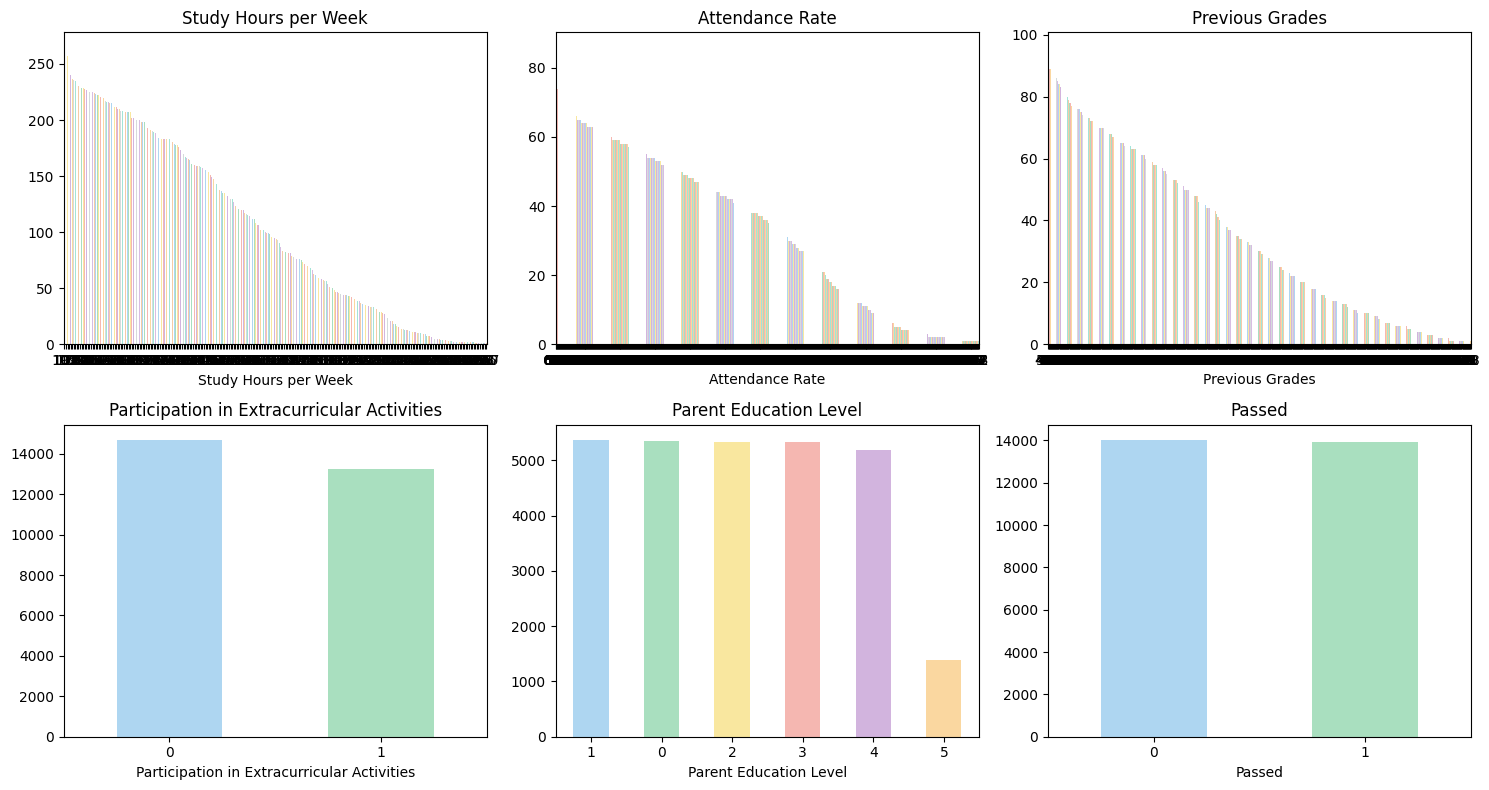

In [20]:
draw_bar(dataDF)

## DecisionTree

- target, feature 분리

In [21]:
featureDF=dataDF[dataDF.columns[:-1]]
targetSR=dataDF[dataDF.columns[-1:]]

In [22]:
featureDF.head()

Study Hours per Week  Attendance Rate  Previous Grades  \
1                    93              811              412   
3                   176              626              430   
4                    88              751              533   
5                    88              596              499   
6                   179              244              742   

   Participation in Extracurricular Activities  Parent Education Level  
1                                            0                       3  
3                                            1                       1  
4                                            0                       4  
5                                            1                       3  
6                                            0                       2

In [23]:
targetSR.head()

Passed
1       0
3       0
4       0
5       1
6       1

- 학습과 테스트 데이터 세트로 분리

In [24]:
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    random_state=777)

- DecisionTree Classifier생성

In [25]:
dt_clf=DecisionTreeClassifier(max_depth=20,random_state=777)

- 학습 

In [26]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20, random_state=777)

In [27]:
# export_graphiz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf,out_file='Student_tree.dot', 
                class_names=['0','1'],
                feature_names=featureDF.columns,
                impurity=True,filled=True)

In [30]:
import graphviz

with open('Student_tree.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

In [31]:
dt_clf.score(X_test,y_test)

0.5002860411899314

In [32]:
parameters={'max_depth':[10,15,20,25,30],'min_samples_split':[2,3,4,5]}

In [33]:
from sklearn.model_selection import GridSearchCV
grid_dtree=GridSearchCV(dt_clf,param_grid=parameters,cv=5,refit=True)

In [34]:
grid_dtree.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=20, random_state=777),
             param_grid={'max_depth': [10, 15, 20, 25, 30],
                         'min_samples_split': [2, 3, 4, 5]})

In [35]:
dataDF2=pd.DataFrame(grid_dtree.cv_results_)
dataDF2[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

params  mean_test_score  \
0   {'max_depth': 10, 'min_samples_split': 2}         0.507509   
1   {'max_depth': 10, 'min_samples_split': 3}         0.507652   
2   {'max_depth': 10, 'min_samples_split': 4}         0.507795   
3   {'max_depth': 10, 'min_samples_split': 5}         0.507891   
4   {'max_depth': 15, 'min_samples_split': 2}         0.499547   
5   {'max_depth': 15, 'min_samples_split': 3}         0.500071   
6   {'max_depth': 15, 'min_samples_split': 4}         0.499642   
7   {'max_depth': 15, 'min_samples_split': 5}         0.498927   
8   {'max_depth': 20, 'min_samples_split': 2}         0.499166   
9   {'max_depth': 20, 'min_samples_split': 3}         0.499023   
10  {'max_depth': 20, 'min_samples_split': 4}         0.499833   
11  {'max_depth': 20, 'min_samples_split': 5}         0.499833   
12  {'max_depth': 25, 'min_samples_split': 2}         0.500357   
13  {'max_depth': 25, 'min_samples_split': 3}         0.499499   
14  {'max_depth': 25, 'min_samples_split': 4}         0.501168   
15  {'max_depth': 25, 'min_samples_split': 5}         0.500739   
16  {'max_depth': 30, 'min_samples_split': 2}         0.501740   
17  {'max_depth': 30, 'min_samples_split': 3}         0.501931   
18  {'max_depth': 30, 'min_samples_split': 4}         0.499594   
19  {'max_depth': 30, 'min_samples_split': 5}         0.502408   

    rank_test_score  split0_test_score  split1_test_score  split2_test_score  
0                 4           0.514660           0.507271           0.507747  
1                 3           0.515375           0.507747           0.508462  
2                 2           0.515614           0.507032           0.508462  
3                 1           0.515137           0.507032           0.508939  
4                16           0.500119           0.499166           0.502026  
5                11           0.500596           0.501788           0.501549  
6                14           0.501788           0.501311           0.501788  
7                20           0.500358           0.499642           0.499166  
8                18           0.489869           0.502741           0.501788  
9                19           0.488200           0.502265           0.505840  
10               12           0.491061           0.501549           0.502265  
11               13           0.488915           0.502980           0.506555  
12               10           0.512515           0.491538           0.502026  
13               17           0.508701           0.491538           0.495590  
14                8           0.510608           0.495828           0.506317  
15                9           0.511561           0.495113           0.503218  
16                7           0.505364           0.491776           0.507271  
17                6           0.504172           0.492729           0.506317  
18               15           0.501311           0.498212           0.507271  
19                5           0.500596           0.498689           0.510608

In [36]:
# 가장 좋은 모델
best_model = grid_dtree.best_estimator_
print(f'best_model.max_depth: {best_model.max_depth}')
print(f'best_model.min_samples_leaf: {best_model.min_samples_leaf}')

best_model.max_depth: 10
best_model.min_samples_leaf: 1


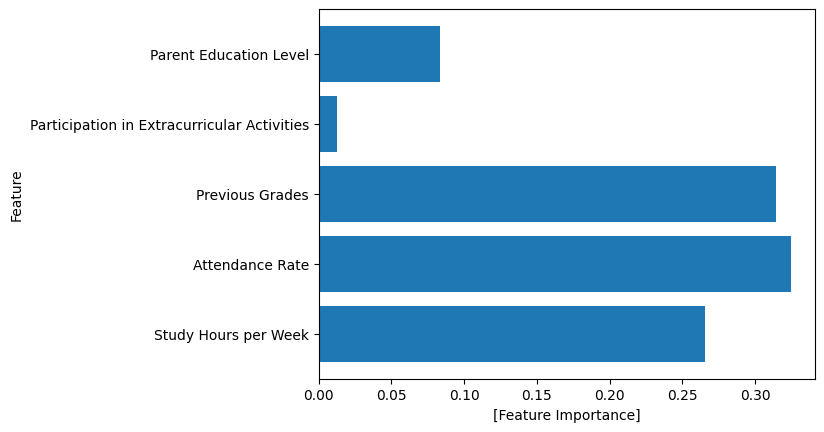

In [37]:

plt.barh(range(best_model.n_features_in_), best_model.feature_importances_, align='center')
plt.yticks(np.arange(best_model.n_features_in_), best_model.feature_names_in_)
plt.xlabel('[Feature Importance]')
plt.ylabel('Feature')
plt.show()

In [38]:
# GridSearchCV에서 최적의 결정 트리 모델 추출
best_dtree = grid_dtree.best_estimator_

# 결정 트리 시각화
export_graphviz(best_dtree, 
                out_file='Student_tree2.dot', 
                class_names=['0', '1'],
                feature_names=featureDF.columns,
                impurity=True, 
                filled=True)

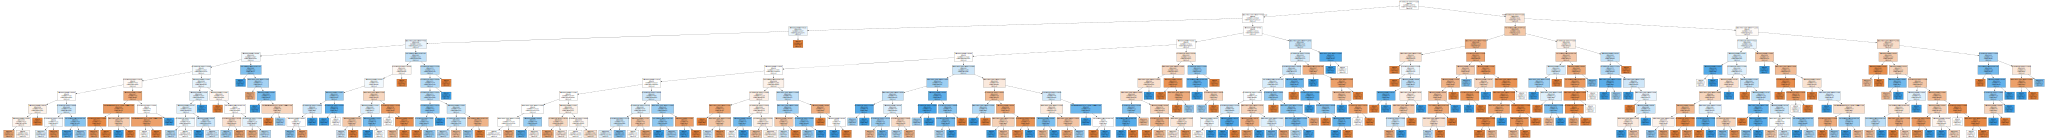

In [39]:
# 생성된 dot 파일을 읽어 시각화
with open('Student_tree2.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [40]:
parameters2={'max_depth':[5,6,7,8,9,10],'min_samples_split':[2,3,4,5,6,7,8,9]}
grid_dtree2=GridSearchCV(dt_clf,param_grid=parameters2,cv=20,refit=True)
grid_dtree2.fit(X_train,y_train)

dataDF3=pd.DataFrame(grid_dtree2.cv_results_)
dataDF3[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]



params  mean_test_score  \
0    {'max_depth': 5, 'min_samples_split': 2}         0.501028   
1    {'max_depth': 5, 'min_samples_split': 3}         0.501028   
2    {'max_depth': 5, 'min_samples_split': 4}         0.500981   
3    {'max_depth': 5, 'min_samples_split': 5}         0.500981   
4    {'max_depth': 5, 'min_samples_split': 6}         0.500981   
5    {'max_depth': 5, 'min_samples_split': 7}         0.500981   
6    {'max_depth': 5, 'min_samples_split': 8}         0.500933   
7    {'max_depth': 5, 'min_samples_split': 9}         0.500933   
8    {'max_depth': 6, 'min_samples_split': 2}         0.497644   
9    {'max_depth': 6, 'min_samples_split': 3}         0.497739   
10   {'max_depth': 6, 'min_samples_split': 4}         0.497596   
11   {'max_depth': 6, 'min_samples_split': 5}         0.497596   
12   {'max_depth': 6, 'min_samples_split': 6}         0.497644   
13   {'max_depth': 6, 'min_samples_split': 7}         0.497691   
14   {'max_depth': 6, 'min_samples_split': 8}         0.497596   
15   {'max_depth': 6, 'min_samples_split': 9}         0.497596   
16   {'max_depth': 7, 'min_samples_split': 2}         0.498740   
17   {'max_depth': 7, 'min_samples_split': 3}         0.498835   
18   {'max_depth': 7, 'min_samples_split': 4}         0.498597   
19   {'max_depth': 7, 'min_samples_split': 5}         0.498501   
20   {'max_depth': 7, 'min_samples_split': 6}         0.498644   
21   {'max_depth': 7, 'min_samples_split': 7}         0.498644   
22   {'max_depth': 7, 'min_samples_split': 8}         0.498597   
23   {'max_depth': 7, 'min_samples_split': 9}         0.498597   
24   {'max_depth': 8, 'min_samples_split': 2}         0.498785   
25   {'max_depth': 8, 'min_samples_split': 3}         0.498547   
26   {'max_depth': 8, 'min_samples_split': 4}         0.498690   
27   {'max_depth': 8, 'min_samples_split': 5}         0.498833   
28   {'max_depth': 8, 'min_samples_split': 6}         0.498881   
29   {'max_depth': 8, 'min_samples_split': 7}         0.498881   
30   {'max_depth': 8, 'min_samples_split': 8}         0.498976   
31   {'max_depth': 8, 'min_samples_split': 9}         0.498881   
32   {'max_depth': 9, 'min_samples_split': 2}         0.498022   
33   {'max_depth': 9, 'min_samples_split': 3}         0.497831   
34   {'max_depth': 9, 'min_samples_split': 4}         0.498165   
35   {'max_depth': 9, 'min_samples_split': 5}         0.497879   
36   {'max_depth': 9, 'min_samples_split': 6}         0.498069   
37   {'max_depth': 9, 'min_samples_split': 7}         0.498546   
38   {'max_depth': 9, 'min_samples_split': 8}         0.498260   
39   {'max_depth': 9, 'min_samples_split': 9}         0.498212   
40  {'max_depth': 10, 'min_samples_split': 2}         0.498215   
41  {'max_depth': 10, 'min_samples_split': 3}         0.498167   
42  {'max_depth': 10, 'min_samples_split': 4}         0.498310   
43  {'max_depth': 10, 'min_samples_split': 5}         0.498167   
44  {'max_depth': 10, 'min_samples_split': 6}         0.497977   
45  {'max_depth': 10, 'min_samples_split': 7}         0.498454   
46  {'max_depth': 10, 'min_samples_split': 8}         0.498215   
47  {'max_depth': 10, 'min_samples_split': 9}         0.498406   

    rank_test_score  split0_test_score  split1_test_score  split2_test_score  
0                 1           0.475691           0.488084           0.478551  
1                 1           0.475691           0.488084           0.478551  
2                 3           0.475691           0.488084           0.478551  
3                 3           0.475691           0.488084           0.478551  
4                 3           0.475691           0.488084           0.478551  
5                 3           0.475691           0.488084           0.478551  
6                 7           0.475691           0.488084           0.478551  
7                 7           0.475691           0.488084           0.478551  
8                44           0.473785           0.464252           0.482364  
9             

best_model.max_depth: 5
best_model.min_samples_leaf: 1


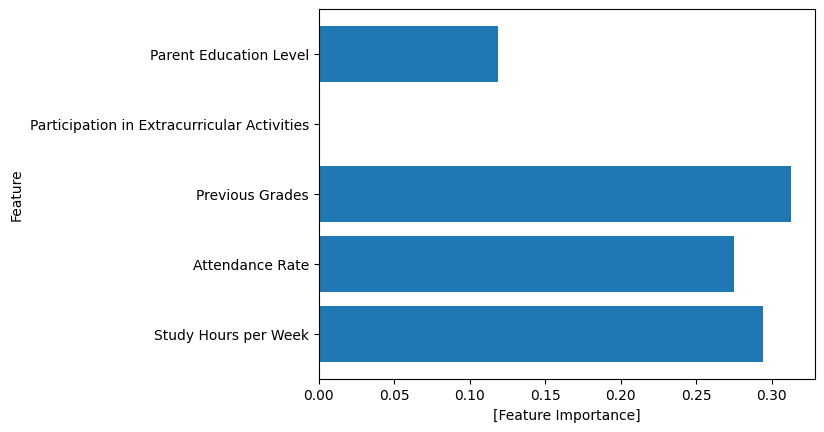

In [41]:
# 가장 좋은 모델
best_model = grid_dtree2.best_estimator_
print(f'best_model.max_depth: {best_model.max_depth}')
print(f'best_model.min_samples_leaf: {best_model.min_samples_leaf}')


plt.barh(range(best_model.n_features_in_), best_model.feature_importances_, align='center')
plt.yticks(np.arange(best_model.n_features_in_), best_model.feature_names_in_)
plt.xlabel('[Feature Importance]')
plt.ylabel('Feature')
plt.show()


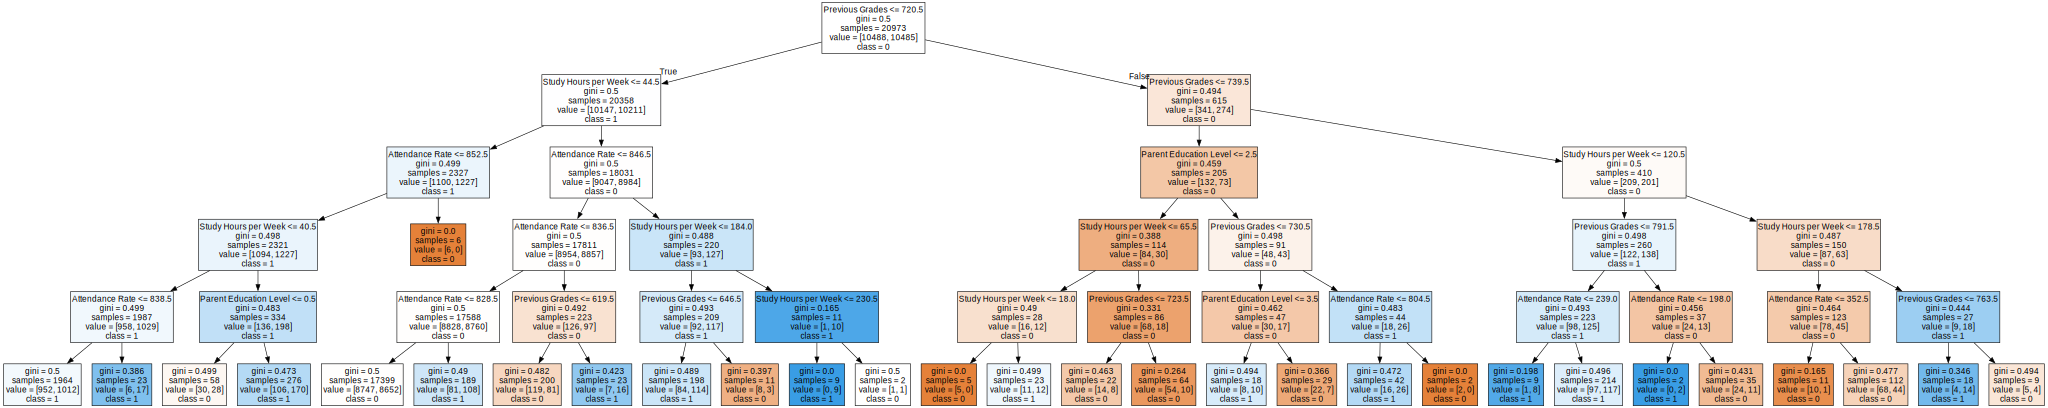

In [42]:
# GridSearchCV에서 최적의 결정 트리 모델 추출
best_dtree3 = grid_dtree2.best_estimator_

# 결정 트리 시각화
export_graphviz(best_dtree3, 
                out_file='Student_tree2.dot', 
                class_names=['0', '1'],
                feature_names=featureDF.columns,
                impurity=True, 
                filled=True)


# 생성된 dot 파일을 읽어 시각화
with open('Student_tree2.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [43]:
from sklearn.metrics import confusion_matrix
pred = best_dtree3.predict(X_test)
confusion = confusion_matrix(pred, y_test)
confusion

array([[3061, 2949],
       [ 486,  496]], dtype=int64)

In [44]:
parameters2={'max_depth':[5,6,7,8,9,10],'max_leaf_nodes':[10],'min_samples_split':[2,3,4,5,6,7,8,9]}
grid_dtree2=GridSearchCV(dt_clf,param_grid=parameters2,cv=20,refit=True)
grid_dtree2.fit(X_train,y_train)

dataDF3=pd.DataFrame(grid_dtree2.cv_results_)
dataDF3[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

params  mean_test_score  \
0   {'max_depth': 5, 'max_leaf_nodes': 10, 'min_sa...         0.497163   
1   {'max_depth': 5, 'max_leaf_nodes': 10, 'min_sa...         0.497163   
2   {'max_depth': 5, 'max_leaf_nodes': 10, 'min_sa...         0.497163   
3   {'max_depth': 5, 'max_leaf_nodes': 10, 'min_sa...         0.497163   
4   {'max_depth': 5, 'max_leaf_nodes': 10, 'min_sa...         0.497163   
5   {'max_depth': 5, 'max_leaf_nodes': 10, 'min_sa...         0.497163   
6   {'max_depth': 5, 'max_leaf_nodes': 10, 'min_sa...         0.497163   
7   {'max_depth': 5, 'max_leaf_nodes': 10, 'min_sa...         0.497163   
8   {'max_depth': 6, 'max_leaf_nodes': 10, 'min_sa...         0.497115   
9   {'max_depth': 6, 'max_leaf_nodes': 10, 'min_sa...         0.497115   
10  {'max_depth': 6, 'max_leaf_nodes': 10, 'min_sa...         0.497115   
11  {'max_depth': 6, 'max_leaf_nodes': 10, 'min_sa...         0.497115   
12  {'max_depth': 6, 'max_leaf_nodes': 10, 'min_sa...         0.497115   
13  {'max_depth': 6, 'max_leaf_nodes': 10, 'min_sa...         0.497115   
14  {'max_depth': 6, 'max_leaf_nodes': 10, 'min_sa...         0.497115   
15  {'max_depth': 6, 'max_leaf_nodes': 10, 'min_sa...         0.497115   
16  {'max_depth': 7, 'max_leaf_nodes': 10, 'min_sa...         0.496447   
17  {'max_depth': 7, 'max_leaf_nodes': 10, 'min_sa...         0.496447   
18  {'max_depth': 7, 'max_leaf_nodes': 10, 'min_sa...         0.496447   
19  {'max_depth': 7, 'max_leaf_nodes': 10, 'min_sa...         0.496447   
20  {'max_depth': 7, 'max_leaf_nodes': 10, 'min_sa...         0.496447   
21  {'max_depth': 7, 'max_leaf_nodes': 10, 'min_sa...         0.496447   
22  {'max_depth': 7, 'max_leaf_nodes': 10, 'min_sa...         0.496447   
23  {'max_depth': 7, 'max_leaf_nodes': 10, 'min_sa...         0.496447   
24  {'max_depth': 8, 'max_leaf_nodes': 10, 'min_sa...         0.496447   
25  {'max_depth': 8, 'max_leaf_nodes': 10, 'min_sa...         0.496447   
26  {'max_depth': 8, 'max_leaf_nodes': 10, 'min_sa...         0.496447   
27  {'max_depth': 8, 'max_leaf_nodes': 10, 'min_sa...         0.496447   
28  {'max_depth': 8, 'max_leaf_nodes': 10, 'min_sa...         0.496447   
29  {'max_depth': 8, 'max_leaf_nodes': 10, 'min_sa...         0.496447   
30  {'max_depth': 8, 'max_leaf_nodes': 10, 'min_sa...         0.496447   
31  {'max_depth': 8, 'max_leaf_nodes': 10, 'min_sa...         0.496447   
32  {'max_depth': 9, 'max_leaf_nodes': 10, 'min_sa...         0.496447   
33  {'max_depth': 9, 'max_leaf_nodes': 10, 'min_sa...         0.496447   
34  {'max_depth': 9, 'max_leaf_nodes': 10, 'min_sa...         0.496447   
35  {'max_depth': 9, 'max_leaf_nodes': 10, 'min_sa...         0.496447   
36  {'max_depth': 9, 'max_leaf_nodes': 10, 'min_sa...         0.496447   
37  {'max_depth': 9, 'max_leaf_nodes': 10, 'min_sa...         0.496447   
38  {'max_depth': 9, 'max_leaf_nodes': 10, 'min_sa...         0.496447   
39  {'max_depth': 9, 'max_leaf_nodes': 10, 'min_sa...         0.496447   
40  {'max_depth': 10, 'max_leaf_nodes': 10, 'min_s...         0.496447   
41  {'max_depth': 10, 'max_leaf_nodes': 10, 'min_s...         0.496447   
42  {'max_depth': 10, 'max_leaf_nodes': 10, 'min_s...         0.496447   
43  {'max_depth': 10, 'max_leaf_nodes': 10, 'min_s...         0.496447   
44  {'max_depth': 10, 'max_leaf_nodes': 10, 'min_s...         0.496447   
45  {'max_depth': 10, 'max_leaf_nodes': 10, 'min_s...         0.496447   
46  {'max_depth': 10, 'max_leaf_nodes': 10, 'min_s...         0.496447   
47  {'max_depth': 10, 'max_leaf_nodes': 10, 'min_s...         0.496447   

    rank_test_score  split0_test_score  split1_test_score  split2_test_score  
0                 1           0.477598           0.486177           0.500477  
1                 1           0.477598           0.486177           0.500477  
2                 1           0.477598           0.486177           0.500477  
3                 1           0.477598           0.486177           0.500477  
4                 1      

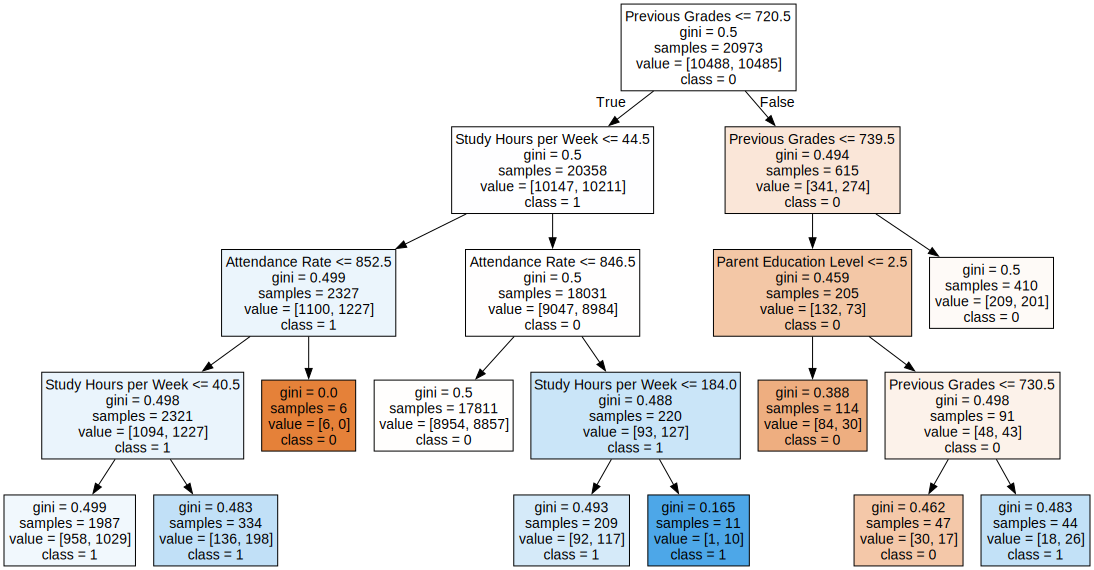

In [45]:
# GridSearchCV에서 최적의 결정 트리 모델 추출
best_dtree3 = grid_dtree2.best_estimator_

# 결정 트리 시각화
export_graphviz(best_dtree3, 
                out_file='Student_tree2.dot', 
                class_names=['0', '1'],
                feature_names=featureDF.columns,
                impurity=True, 
                filled=True)


# 생성된 dot 파일을 읽어 시각화
with open('Student_tree2.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [46]:
pred = best_dtree3.predict(X_test)
confusion = confusion_matrix(pred, y_test)
confusion

array([[3123, 3021],
       [ 424,  424]], dtype=int64)

In [47]:
parameters2={'max_depth':[20,25,30,35,40,45],'max_leaf_nodes':[10],'min_samples_split':[2,3,4,5,6,7,8,9]}
grid_dtree2=GridSearchCV(dt_clf,param_grid=parameters2,cv=20,refit=True)
grid_dtree2.fit(X_train,y_train)

dataDF3=pd.DataFrame(grid_dtree2.cv_results_)
dataDF3[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

params  mean_test_score  \
0   {'max_depth': 20, 'max_leaf_nodes': 10, 'min_s...         0.496447   
1   {'max_depth': 20, 'max_leaf_nodes': 10, 'min_s...         0.496447   
2   {'max_depth': 20, 'max_leaf_nodes': 10, 'min_s...         0.496447   
3   {'max_depth': 20, 'max_leaf_nodes': 10, 'min_s...         0.496447   
4   {'max_depth': 20, 'max_leaf_nodes': 10, 'min_s...         0.496447   
5   {'max_depth': 20, 'max_leaf_nodes': 10, 'min_s...         0.496447   
6   {'max_depth': 20, 'max_leaf_nodes': 10, 'min_s...         0.496447   
7   {'max_depth': 20, 'max_leaf_nodes': 10, 'min_s...         0.496447   
8   {'max_depth': 25, 'max_leaf_nodes': 10, 'min_s...         0.496447   
9   {'max_depth': 25, 'max_leaf_nodes': 10, 'min_s...         0.496447   
10  {'max_depth': 25, 'max_leaf_nodes': 10, 'min_s...         0.496447   
11  {'max_depth': 25, 'max_leaf_nodes': 10, 'min_s...         0.496447   
12  {'max_depth': 25, 'max_leaf_nodes': 10, 'min_s...         0.496447   
13  {'max_depth': 25, 'max_leaf_nodes': 10, 'min_s...         0.496447   
14  {'max_depth': 25, 'max_leaf_nodes': 10, 'min_s...         0.496447   
15  {'max_depth': 25, 'max_leaf_nodes': 10, 'min_s...         0.496447   
16  {'max_depth': 30, 'max_leaf_nodes': 10, 'min_s...         0.496447   
17  {'max_depth': 30, 'max_leaf_nodes': 10, 'min_s...         0.496447   
18  {'max_depth': 30, 'max_leaf_nodes': 10, 'min_s...         0.496447   
19  {'max_depth': 30, 'max_leaf_nodes': 10, 'min_s...         0.496447   
20  {'max_depth': 30, 'max_leaf_nodes': 10, 'min_s...         0.496447   
21  {'max_depth': 30, 'max_leaf_nodes': 10, 'min_s...         0.496447   
22  {'max_depth': 30, 'max_leaf_nodes': 10, 'min_s...         0.496447   
23  {'max_depth': 30, 'max_leaf_nodes': 10, 'min_s...         0.496447   
24  {'max_depth': 35, 'max_leaf_nodes': 10, 'min_s...         0.496447   
25  {'max_depth': 35, 'max_leaf_nodes': 10, 'min_s...         0.496447   
26  {'max_depth': 35, 'max_leaf_nodes': 10, 'min_s...         0.496447   
27  {'max_depth': 35, 'max_leaf_nodes': 10, 'min_s...         0.496447   
28  {'max_depth': 35, 'max_leaf_nodes': 10, 'min_s...         0.496447   
29  {'max_depth': 35, 'max_leaf_nodes': 10, 'min_s...         0.496447   
30  {'max_depth': 35, 'max_leaf_nodes': 10, 'min_s...         0.496447   
31  {'max_depth': 35, 'max_leaf_nodes': 10, 'min_s...         0.496447   
32  {'max_depth': 40, 'max_leaf_nodes': 10, 'min_s...         0.496447   
33  {'max_depth': 40, 'max_leaf_nodes': 10, 'min_s...         0.496447   
34  {'max_depth': 40, 'max_leaf_nodes': 10, 'min_s...         0.496447   
35  {'max_depth': 40, 'max_leaf_nodes': 10, 'min_s...         0.496447   
36  {'max_depth': 40, 'max_leaf_nodes': 10, 'min_s...         0.496447   
37  {'max_depth': 40, 'max_leaf_nodes': 10, 'min_s...         0.496447   
38  {'max_depth': 40, 'max_leaf_nodes': 10, 'min_s...         0.496447   
39  {'max_depth': 40, 'max_leaf_nodes': 10, 'min_s...         0.496447   
40  {'max_depth': 45, 'max_leaf_nodes': 10, 'min_s...         0.496447   
41  {'max_depth': 45, 'max_leaf_nodes': 10, 'min_s...         0.496447   
42  {'max_depth': 45, 'max_leaf_nodes': 10, 'min_s...         0.496447   
43  {'max_depth': 45, 'max_leaf_nodes': 10, 'min_s...         0.496447   
44  {'max_depth': 45, 'max_leaf_nodes': 10, 'min_s...         0.496447   
45  {'max_depth': 45, 'max_leaf_nodes': 10, 'min_s...         0.496447   
46  {'max_depth': 45, 'max_leaf_nodes': 10, 'min_s...         0.496447   
47  {'max_depth': 45, 'max_leaf_nodes': 10, 'min_s...         0.496447   

    rank_test_score  split0_test_score  split1_test_score  split2_test_score  
0                 1           0.477598           0.486177           0.500477  
1                 1           0.477598           0.486177           0.500477  
2                 1           0.477598           0.486177           0.500477  
3                 1           0.477598           0.486177           0.500477  
4                 1      

In [48]:
parameters2={'max_depth':[20,25,30,35,40,45],'min_samples_split':[2,3,4,5,6,7,8,9]}
grid_dtree2=GridSearchCV(dt_clf,param_grid=parameters2,cv=20,refit=True)
grid_dtree2.fit(X_train,y_train)

dataDF3=pd.DataFrame(grid_dtree2.cv_results_)
dataDF3[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

params  mean_test_score  \
0   {'max_depth': 20, 'min_samples_split': 2}         0.497689   
1   {'max_depth': 20, 'min_samples_split': 3}         0.498451   
2   {'max_depth': 20, 'min_samples_split': 4}         0.497688   
3   {'max_depth': 20, 'min_samples_split': 5}         0.498022   
4   {'max_depth': 20, 'min_samples_split': 6}         0.498928   
5   {'max_depth': 20, 'min_samples_split': 7}         0.499262   
6   {'max_depth': 20, 'min_samples_split': 8}         0.497736   
7   {'max_depth': 20, 'min_samples_split': 9}         0.499549   
8   {'max_depth': 25, 'min_samples_split': 2}         0.505795   
9   {'max_depth': 25, 'min_samples_split': 3}         0.502839   
10  {'max_depth': 25, 'min_samples_split': 4}         0.504412   
11  {'max_depth': 25, 'min_samples_split': 5}         0.504317   
12  {'max_depth': 25, 'min_samples_split': 6}         0.503554   
13  {'max_depth': 25, 'min_samples_split': 7}         0.504605   
14  {'max_depth': 25, 'min_samples_split': 8}         0.504604   
15  {'max_depth': 25, 'min_samples_split': 9}         0.506940   
16  {'max_depth': 30, 'min_samples_split': 2}         0.503363   
17  {'max_depth': 30, 'min_samples_split': 3}         0.503411   
18  {'max_depth': 30, 'min_samples_split': 4}         0.502742   
19  {'max_depth': 30, 'min_samples_split': 5}         0.504316   
20  {'max_depth': 30, 'min_samples_split': 6}         0.504411   
21  {'max_depth': 30, 'min_samples_split': 7}         0.506414   
22  {'max_depth': 30, 'min_samples_split': 8}         0.503936   
23  {'max_depth': 30, 'min_samples_split': 9}         0.507607   
24  {'max_depth': 35, 'min_samples_split': 2}         0.501169   
25  {'max_depth': 35, 'min_samples_split': 3}         0.499976   
26  {'max_depth': 35, 'min_samples_split': 4}         0.501025   
27  {'max_depth': 35, 'min_samples_split': 5}         0.502838   
28  {'max_depth': 35, 'min_samples_split': 6}         0.503314   
29  {'max_depth': 35, 'min_samples_split': 7}         0.504410   
30  {'max_depth': 35, 'min_samples_split': 8}         0.501789   
31  {'max_depth': 35, 'min_samples_split': 9}         0.504315   
32  {'max_depth': 40, 'min_samples_split': 2}         0.499786   
33  {'max_depth': 40, 'min_samples_split': 3}         0.501787   
34  {'max_depth': 40, 'min_samples_split': 4}         0.503314   
35  {'max_depth': 40, 'min_samples_split': 5}         0.503124   
36  {'max_depth': 40, 'min_samples_split': 6}         0.503124   
37  {'max_depth': 40, 'min_samples_split': 7}         0.502218   
38  {'max_depth': 40, 'min_samples_split': 8}         0.502361   
39  {'max_depth': 40, 'min_samples_split': 9}         0.503505   
40  {'max_depth': 45, 'min_samples_split': 2}         0.498497   
41  {'max_depth': 45, 'min_samples_split': 3}         0.501835   
42  {'max_depth': 45, 'min_samples_split': 4}         0.502170   
43  {'max_depth': 45, 'min_samples_split': 5}         0.500549   
44  {'max_depth': 45, 'min_samples_split': 6}         0.503839   
45  {'max_depth': 45, 'min_samples_split': 7}         0.503075   
46  {'max_depth': 45, 'min_samples_split': 8}         0.502360   
47  {'max_depth': 45, 'min_samples_split': 9}         0.502837   

    rank_test_score  split0_test_score  split1_test_score  split2_test_score  
0                47           0.502383           0.499523           0.499523  
1                44           0.507150           0.498570           0.505243  
2                48           0.501430           0.500477           0.507150  
3                45           0.506196           0.501430           0.503337  
4                42           0.508103           0.503337           0.502383  
5                41           0.506196           0.498570           0.499523  
6                46           0.505243           0.501430           0.499523  
7                40           0.512869           0.497617           0.504290  
8                 4           0.505243           0.495710           0.517636  
9             

In [49]:
dataDF3

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.149373      0.025874         0.004807        0.000759   
1        0.142298      0.021827         0.005134        0.001123   
2        0.130128      0.014343         0.004437        0.000851   
3        0.139727      0.021413         0.005273        0.000889   
4        0.132683      0.018206         0.004552        0.000744   
5        0.138113      0.021308         0.004986        0.001026   
6        0.134854      0.015854         0.005248        0.001119   
7        0.133090      0.012433         0.004958        0.001013   
8        0.184661      0.025985         0.005299        0.001061   
9        0.171006      0.014223         0.004625        0.000838   
10       0.175073      0.011656         0.005271        0.000990   
11       0.186116      0.031714         0.005487        0.000942   
12       0.178995      0.016594         0.005151        0.000864   
13       0.180077      0.016417         0.005274        0.000749   
14       0.190612      0.031786         0.005327        0.001006   
15       0.181067      0.012825         0.005542        0.000803   
16       0.222892      0.028386         0.005225        0.000689   
17       0.212988      0.016940         0.005154        0.001010   
18       0.204246      0.016841         0.005262        0.000906   
19       0.209016      0.025256         0.005894        0.002151   
20       0.186118      0.013395         0.004938        0.000972   
21       0.178037      0.010269         0.004838        0.000794   
22       0.186324      0.049979         0.004847        0.000774   
23       0.183251      0.039677         0.005336        0.001756   
24       0.181573      0.012534         0.004490        0.001023   
25       0.180094      0.014586         0.004488        0.000968   
26       0.182349      0.022150         0.004693        0.001094   
27       0.170008      0.009157         0.004392        0.000969   
28       0.163742      0.012127         0.004436        0.000742   
29       0.161191      0.011214         0.004332        0.000853   
30       0.164399      0.018314         0.004044        0.000800   
31       0.157196      0.008074         0.004286        0.001047   
32       0.174719      0.007692         0.004678        0.001206   
33       0.174665      0.011774         0.004244        0.000635   
34       0.175191      0.021585         0.004288        0.000834   
35       0.172882      0.008854         0.003982        0.000694   
36       0.172364      0.009179         0.004358        0.000566   
37       0.174371      0.030588         0.004485        0.000917   
38       0.173380      0.024805         0.004341        0.000721   
39       0.161369      0.010738         0.004634        0.000789   
40       0.188174      0.027110         0.004427        0.000666   
41       0.186768      0.025897         0.004475        0.000855   
42       0.182144      0.021898         0.004043        0.000763   
43       0.181552      0.029994         0.004474        0.000794   
44       0.171849      0.013073         0.004477        0.000832   
45       0.177744      0.018055         0.005009        0.002171   
46       0.167507      0.011935         0.004331        0.000727   
47       0.166669      0.013378         0.003990        0.000762   

   param_max_depth param_min_samples_split  \
0               20                       2   
1               20                       3   
2               20                       4   
3               20                       5   
4               20                       6   
5               20                       7   
6               20                       8   
7               20                       9   
8               25                       2   
9               25                       3   
10              25                       4   
11              25                       5   
12              25                       6   
13              25         

In [50]:
from sklearn.tree import DecisionTreeClassifier
import joblib  # 모델을 저장하고 불러오기 위해 joblib을 불러옴

# 결정 트리 모델 생성 (이미 학습된 모델이 있다고 가정)
# model = DecisionTreeClassifier()

# 모델을 학습시키는 코드
# model.fit(X_train, y_train)

# 학습된 모델을 파일로 저장
joblib.dump(grid_dtree2, 'decision_tree_model.pkl')

print("모델이 성공적으로 저장되었습니다!")

모델이 성공적으로 저장되었습니다!
